# INSTALLTION SECTION OF DEPENDENCIES

## Libraries section

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer

## Loading the data 

In [2]:
df = pd.read_csv('pp.csv')
df

,Pop2023,Pop2022,City,Country,Continent,growthRate,rank,Unnamed: 7
0,37194104,37274000,Tokyo,Japan,Asia,-0.0021,1,NaN
1,32941308,32065760,Delhi,India,Asia,0.0273,2,NaN
2,29210808,28516904,Shanghai,China,Asia,0.0243,3,NaN
3,23209616,22478116,Dhaka,Bangladesh,Asia,0.0325,4,NaN
4,22619736,22429800,Sao Paulo,Brazil,South America,0.0085,5,NaN
...,...,...,...,...,...,...,...,...
773,752916,734805,Tongling,China,Asia,0.0246,774,NaN
774,752744,729109,Tirupati,India,Asia,0.0324,775,NaN
775,751679,733917,Wuzhou,China,Asia,0.0242,776,NaN
776,750102,723114,Yuxi,China,Asia,0.0373,777,NaN


In [3]:
df.shape

(778, 8)

In [4]:
df.index

RangeIndex(start=0, stop=778, step=1)

In [5]:
df.columns

Index(['Pop2023', 'Pop2022', 'City', 'Country', 'Continent', 'growthRate',
       'rank', 'Unnamed: 7'],
      dtype='object')

# 

## Data Pre-processing section

In [6]:
df

,Pop2023,Pop2022,City,Country,Continent,growthRate,rank,Unnamed: 7
0,37194104,37274000,Tokyo,Japan,Asia,-0.0021,1,NaN
1,32941308,32065760,Delhi,India,Asia,0.0273,2,NaN
2,29210808,28516904,Shanghai,China,Asia,0.0243,3,NaN
3,23209616,22478116,Dhaka,Bangladesh,Asia,0.0325,4,NaN
4,22619736,22429800,Sao Paulo,Brazil,South America,0.0085,5,NaN
...,...,...,...,...,...,...,...,...
773,752916,734805,Tongling,China,Asia,0.0246,774,NaN
774,752744,729109,Tirupati,India,Asia,0.0324,775,NaN
775,751679,733917,Wuzhou,China,Asia,0.0242,776,NaN
776,750102,723114,Yuxi,China,Asia,0.0373,777,NaN


In [7]:
new = df.copy()

In [8]:
new

,Pop2023,Pop2022,City,Country,Continent,growthRate,rank,Unnamed: 7
0,37194104,37274000,Tokyo,Japan,Asia,-0.0021,1,NaN
1,32941308,32065760,Delhi,India,Asia,0.0273,2,NaN
2,29210808,28516904,Shanghai,China,Asia,0.0243,3,NaN
3,23209616,22478116,Dhaka,Bangladesh,Asia,0.0325,4,NaN
4,22619736,22429800,Sao Paulo,Brazil,South America,0.0085,5,NaN
...,...,...,...,...,...,...,...,...
773,752916,734805,Tongling,China,Asia,0.0246,774,NaN
774,752744,729109,Tirupati,India,Asia,0.0324,775,NaN
775,751679,733917,Wuzhou,China,Asia,0.0242,776,NaN
776,750102,723114,Yuxi,China,Asia,0.0373,777,NaN


In [9]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pop2023     778 non-null    int64  
 1   Pop2022     778 non-null    int64  
 2   City        778 non-null    object 
 3   Country     778 non-null    object 
 4   Continent   778 non-null    object 
 5   growthRate  778 non-null    float64
 6   rank        778 non-null    int64  
 7   Unnamed: 7  12 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 48.8+ KB


In [10]:
new.isnull().sum()

Pop2023         0
Pop2022         0
City            0
Country         0
Continent       0
growthRate      0
rank            0
Unnamed: 7    766
dtype: int64

In [11]:
new.describe()

,Pop2023,Pop2022,growthRate,rank,Unnamed: 7
count,7.780000e+02,7.780000e+02,778.000000,778.000000,12.000000
mean,2.658927e+06,2.607826e+06,0.020758,389.500000,518.416667
std,3.700349e+06,3.638665e+06,0.013135,224.733546,153.840211
min,7.500970e+05,7.231140e+05,-0.034800,1.000000,227.000000
25%,9.921812e+05,9.657890e+05,0.012625,195.250000,386.500000
50%,1.381252e+06,1.362342e+06,0.019950,389.500000,603.000000
75%,2.607130e+06,2.548158e+06,0.028675,583.750000,639.750000
max,3.719410e+07,3.727400e+07,0.061100,778.000000,676.000000


In [12]:
new.isna().sum()

Pop2023         0
Pop2022         0
City            0
Country         0
Continent       0
growthRate      0
rank            0
Unnamed: 7    766
dtype: int64

In [13]:
# Droping whole null coulmn of the dataset which is 'Unnamed: 7'
new = new.drop(columns='Unnamed: 7')

In [14]:
new.isnull().sum()

Pop2023       0
Pop2022       0
City          0
Country       0
Continent     0
growthRate    0
rank          0
dtype: int64

In [15]:
# For re-checking
new.describe()

,Pop2023,Pop2022,growthRate,rank
count,7.780000e+02,7.780000e+02,778.000000,778.000000
mean,2.658927e+06,2.607826e+06,0.020758,389.500000
std,3.700349e+06,3.638665e+06,0.013135,224.733546
min,7.500970e+05,7.231140e+05,-0.034800,1.000000
25%,9.921812e+05,9.657890e+05,0.012625,195.250000
50%,1.381252e+06,1.362342e+06,0.019950,389.500000
75%,2.607130e+06,2.548158e+06,0.028675,583.750000
max,3.719410e+07,3.727400e+07,0.061100,778.000000


In [16]:
new.shape

(778, 7)

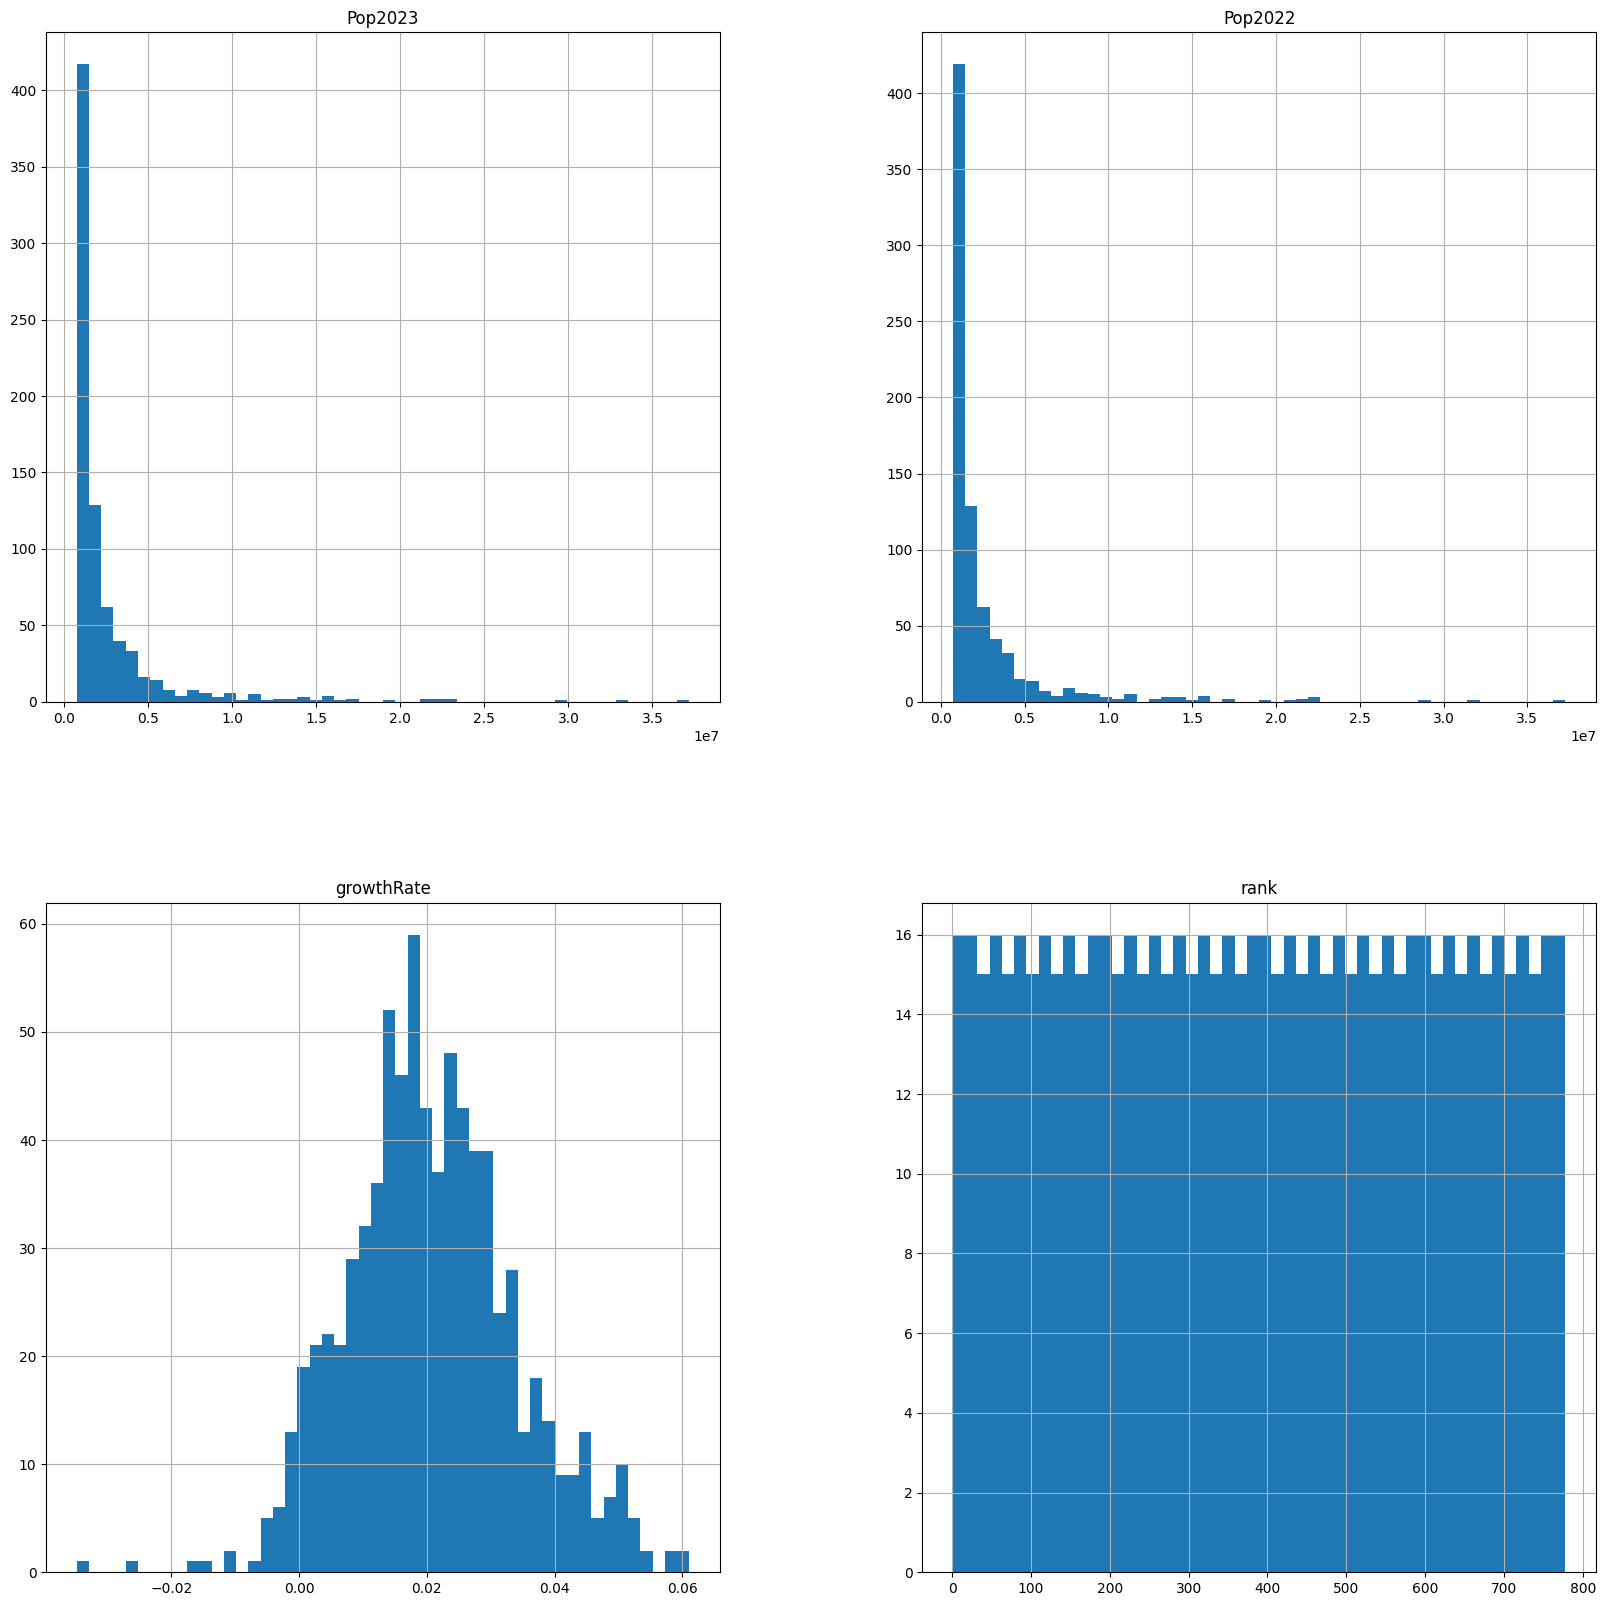

In [17]:
%matplotlib inline
new.hist(bins = 50, figsize=(20, 20))
plt.show()

In [18]:
new.columns

Index(['Pop2023', 'Pop2022', 'City', 'Country', 'Continent', 'growthRate',
       'rank'],
      dtype='object')

In [19]:
sample = new.iloc[:, [0, 1, 5, 6]]

In [20]:
sample

,Pop2023,Pop2022,growthRate,rank
0,37194104,37274000,-0.0021,1
1,32941308,32065760,0.0273,2
2,29210808,28516904,0.0243,3
3,23209616,22478116,0.0325,4
4,22619736,22429800,0.0085,5
...,...,...,...,...
773,752916,734805,0.0246,774
774,752744,729109,0.0324,775
775,751679,733917,0.0242,776
776,750102,723114,0.0373,777


In [21]:
sample.corr()

,Pop2023,Pop2022,growthRate,rank
Pop2023,1.000000,0.999884,-0.054863,-0.618718
Pop2022,0.999884,1.000000,-0.063579,-0.617801
growthRate,-0.054863,-0.063579,1.000000,0.071437
rank,-0.618718,-0.617801,0.071437,1.000000


In [22]:
corr_matrix = sample.corr()

In [23]:
corr_matrix["Pop2022"].sort_values(ascending = True)

rank         -0.617801
growthRate   -0.063579
Pop2023       0.999884
Pop2022       1.000000
Name: Pop2022, dtype: float64

## Feature Selection section

In [24]:
data = new.copy()

In [25]:
data

,Pop2023,Pop2022,City,Country,Continent,growthRate,rank
0,37194104,37274000,Tokyo,Japan,Asia,-0.0021,1
1,32941308,32065760,Delhi,India,Asia,0.0273,2
2,29210808,28516904,Shanghai,China,Asia,0.0243,3
3,23209616,22478116,Dhaka,Bangladesh,Asia,0.0325,4
4,22619736,22429800,Sao Paulo,Brazil,South America,0.0085,5
...,...,...,...,...,...,...,...
773,752916,734805,Tongling,China,Asia,0.0246,774
774,752744,729109,Tirupati,India,Asia,0.0324,775
775,751679,733917,Wuzhou,China,Asia,0.0242,776
776,750102,723114,Yuxi,China,Asia,0.0373,777


In [26]:
data.columns

Index(['Pop2023', 'Pop2022', 'City', 'Country', 'Continent', 'growthRate',
       'rank'],
      dtype='object')

In [27]:
X = data.drop(columns=['City', 'Country', 'growthRate', 'Continent', 'rank',])
y = data.iloc[:, -1]

In [28]:
X

,Pop2023,Pop2022
0,37194104,37274000
1,32941308,32065760
2,29210808,28516904
3,23209616,22478116
4,22619736,22429800
...,...,...
773,752916,734805
774,752744,729109
775,751679,733917
776,750102,723114


In [29]:
y

0        1
1        2
2        3
3        4
4        5
      ... 
773    774
774    775
775    776
776    777
777    778
Name: rank, Length: 778, dtype: int64

## Dataset Spliting section

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 100)


## Load, Fit and Predict section

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
r2_scores = r2_score(y_test, Y_pred)

In [32]:
r2_scores

0.4044303109182038

In [33]:
# Cross validation 10X
lr = LinearRegression()
np.mean(cross_val_score(lr, X, y, scoring='r2'))

-476.0465990505827

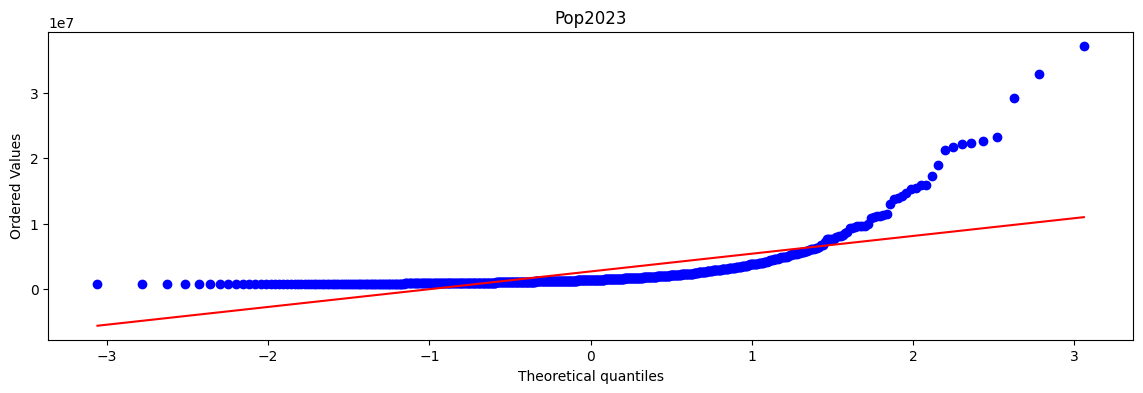

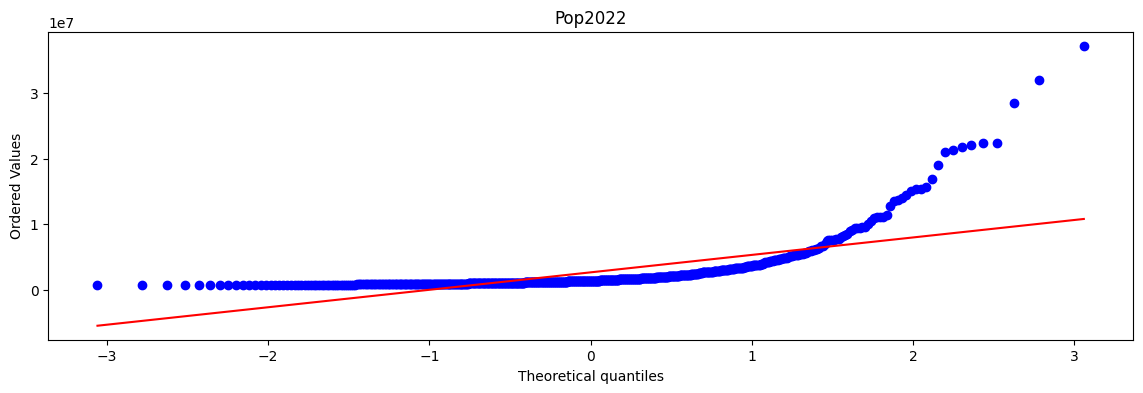

In [34]:
# QQplot for checking the normal Distributions
for col in X_train.columns:
    plt.figure(figsize=(14, 4))
    stat.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)
    plt.show()
    

## Power Transformation (method = "Box-Cox")

In [36]:
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.fit_transform(X_test)
pd.DataFrame({'col':X_train.columns, 'pwtransform':pt.lambdas_})

,col,pwtransform
0,Pop2023,-0.748243
1,Pop2022,-0.743211


In [37]:
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)
y_pred1 = lr.predict(X_test_transformed)
r2_scores_trans = r2_score(y_test, y_pred1)
r2_scores_trans

0.9830637085677326

In [38]:
lr = LinearRegression()
pt = PowerTransformer(method='box-cox')
X_transform = pt.fit_transform(X)

np.mean(cross_val_score(lr, X_transform, y, scoring='r2'))

0.19859630988554172

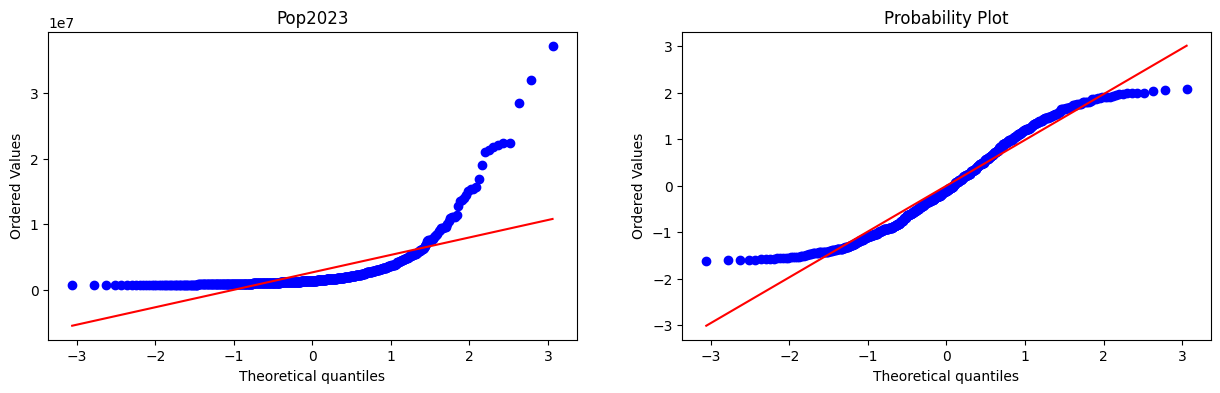

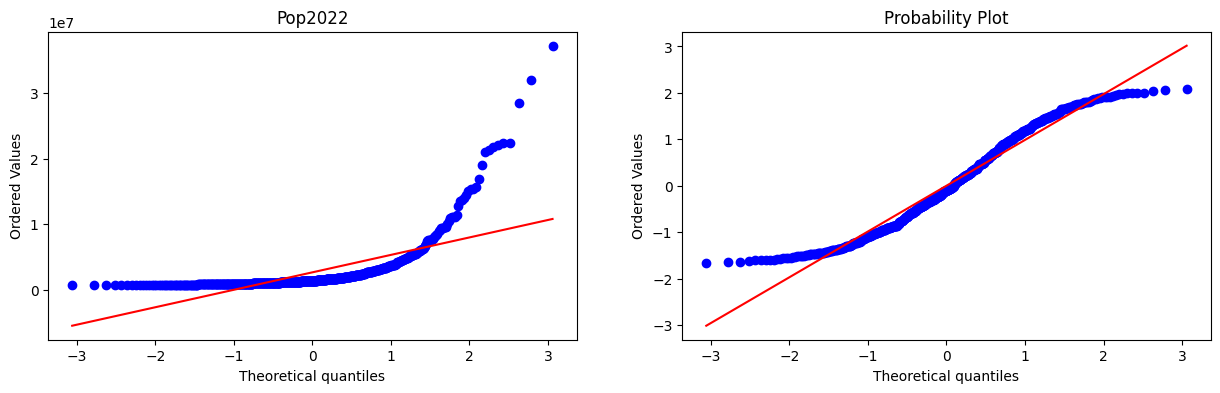

In [39]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns= X_train.columns)
for col1 in X_train_transformed.columns:
    plt.figure(figsize=(15, 4))
    plt.subplot(121)
#     sns.displot(X_train[col])
    stat.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col1)
    
    plt.subplot(122)
    stat.probplot(X_train_transformed[col1], dist="norm", plot=plt)
    plt.show()

## Power Transformation(method = "Yeo-Johnson")

In [43]:
pt_yeo = PowerTransformer()
X_train_transformed1 = pt_yeo.fit_transform(X_train)
X_test_transformed1 = pt_yeo.fit_transform(X_test)
pd.DataFrame({'col':X_train.columns, 'Pt_yeo':pt_yeo.lambdas_})

,col,Pt_yeo
0,Pop2023,-0.748244
1,Pop2022,-0.743212


In [44]:
lr = LinearRegression()
lr.fit(X_train_transformed1, y_train)
y_pred_n = lr.predict(X_test_transformed1)
r2score = r2_score(y_test, y_pred_n)
r2score

0.9830637376624677

In [45]:
lr = LinearRegression()
pt_yeo = PowerTransformer()
X_transformed = pt_yeo.fit_transform(X)
np.mean(cross_val_score(lr, X_transformed,y, scoring='r2'))

0.19858944293978892

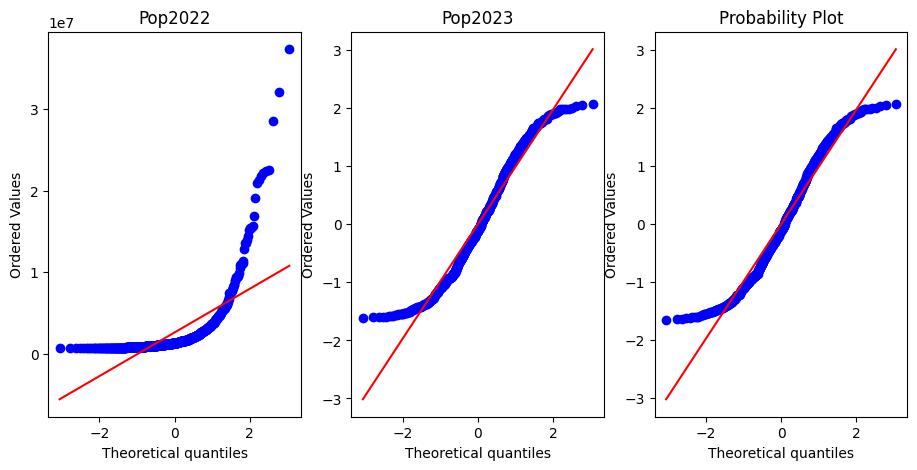

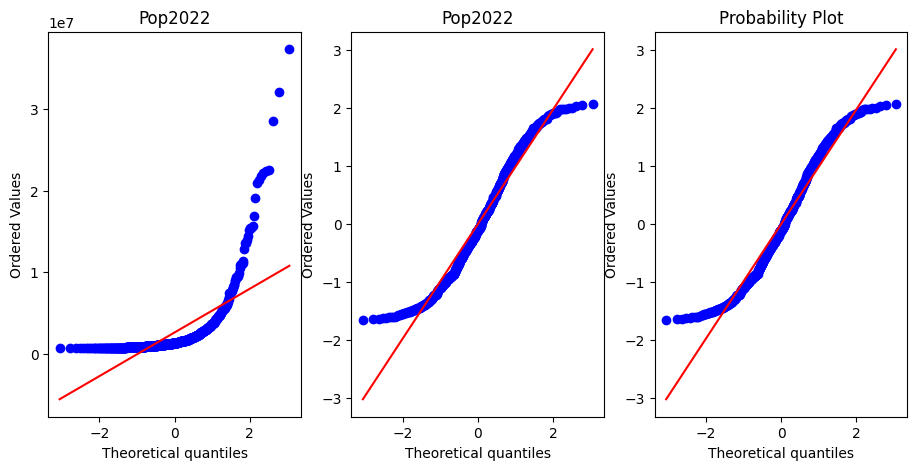

In [46]:
X_train_transformed2 = pd.DataFrame(X_train_transformed1, columns= X_train.columns)
for col3 in X_train_transformed2.columns:
    plt.figure(figsize=(15, 5))
    plt.subplot(141)
    stat.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.subplot(142)
    stat.probplot(X_train_transformed2[col3], dist="norm", plot=plt)
    plt.title(col3)
    
    plt.subplot(143)
    stat.probplot(X_train_transformed[col1], dist="norm", plot=plt)
    plt.show()
    

## Functional Transformation (Log and Square )

In [47]:
# feature selection
X = data.drop(columns=['City', 'Country', 'growthRate', 'Continent', 'rank',])
y = data.iloc[:, -1]

In [48]:
# Dataset is spliting into the training and testing of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 100)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
r2s = r2_score(y_test, Y_pred)
r2s

0.4044303109182038

In [50]:
lr = LinearRegression()
np.mean(cross_val_score(lr, X, y, scoring='r2'))

-476.0465990505827

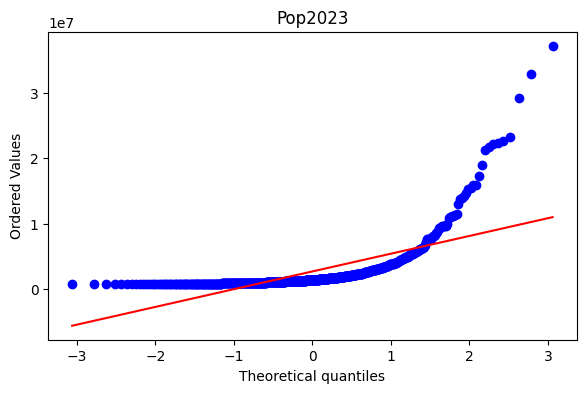

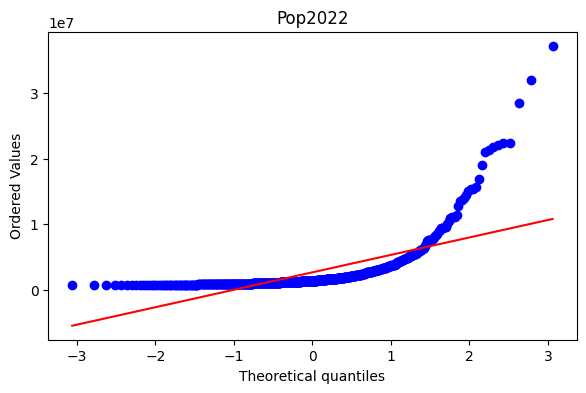

In [51]:
# QQ plot for the getting the direction of normal distribution
for col in X_train.columns:
    plt.figure(figsize=(15, 4))
    plt.subplot(121)
    stat.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)
    plt.show()

In [53]:
#so the qq plot show the data graphs whcih denotes that the data is right skewed,
#so we use logarathmic transformation
log_t = FunctionTransformer(func=np.log1p)
xtrain = log_t.fit_transform(X_train)
xtest = log_t.fit_transform(X_test)

In [55]:
lr = LinearRegression()
lr.fit(xtrain, y_train)
preds = lr.predict(xtest)
r2_log = r2_score(y_test, preds)
r2_log

0.8535585417018277

In [56]:
# CROSS-VALIDATION
lr = LinearRegression()
lt = FunctionTransformer(func = np.log1p)
xtra = lt.fit_transform(X)
croos = np.mean(cross_val_score(lr, xtra, y, scoring="r2"))
croos

-21.35355602131756

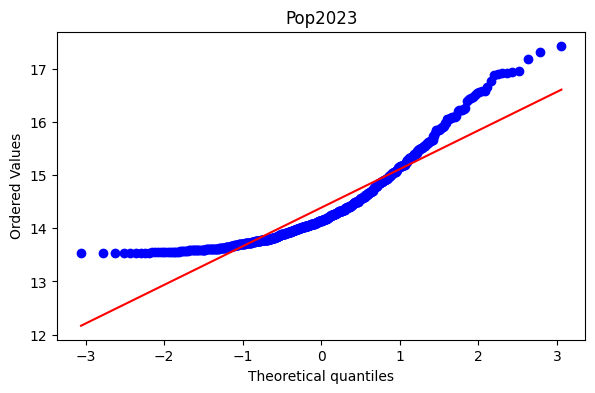

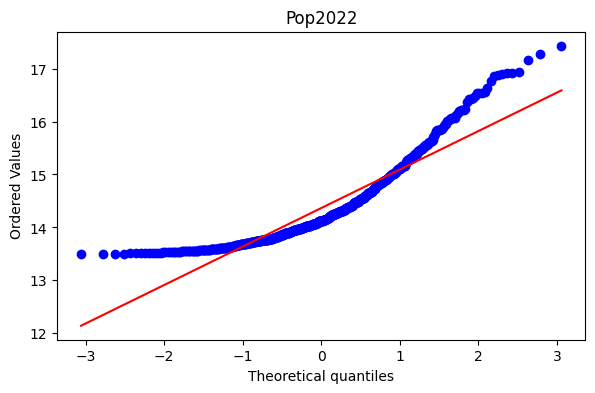

In [58]:
for col in xtrain.columns:
    plt.figure(figsize=(15, 4))
    plt.subplot(121)
    stat.probplot(xtrain[col], dist="norm", plot=plt)
    plt.title(col)
    plt.show()